# Task 4
# Iris Data Classification Using Decision Tree Classifier Algorithm

# 

### Import Packages

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline
sns.set()

### Load & Inspect Data

In [6]:
df = pd.read_csv('Iris_data.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.shape

(150, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 

## EDA

In [18]:
df.drop('Id',axis=1).describe().round(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.0,150.0,150.0,150.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


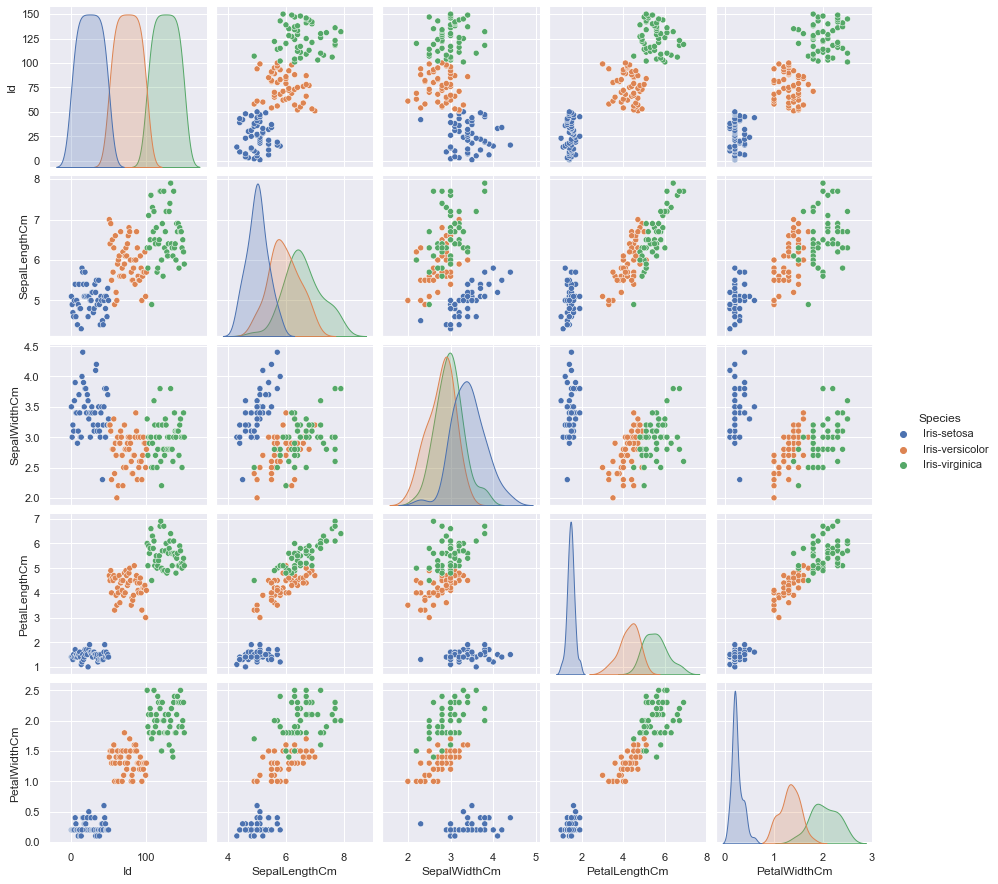

In [15]:
sns.pairplot(df,hue='Species')

<AxesSubplot: >

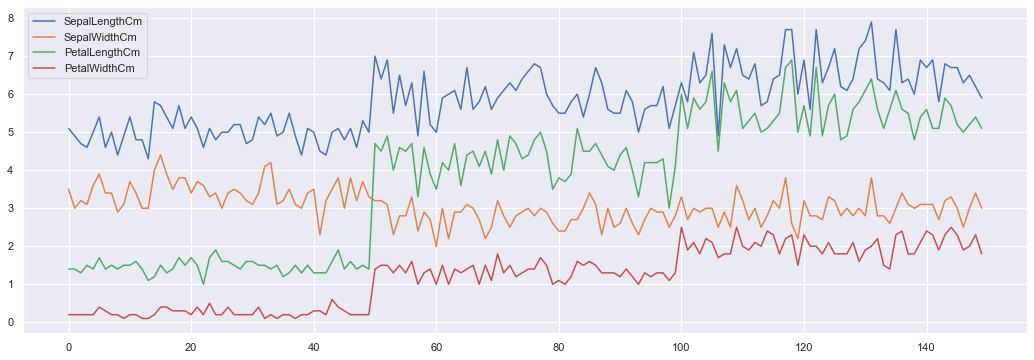

In [28]:
df.drop(({'Species','Id'}),axis=1).plot(figsize=(18,6))

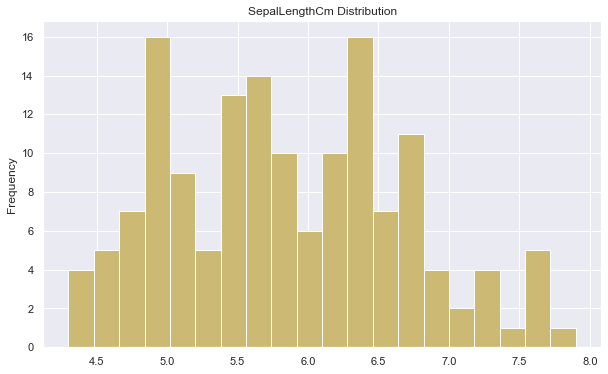

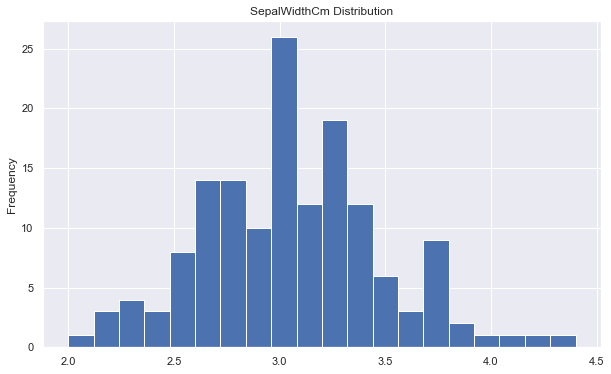

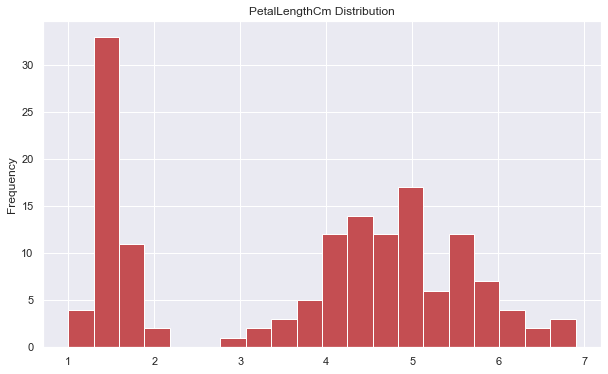

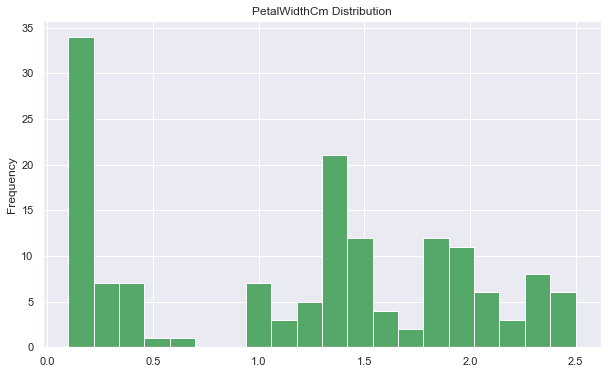

In [48]:
# Plot the distributions of the numerical columns

df['SepalLengthCm'].plot(kind='hist',figsize=(10,6),bins=20,color='y')
plt.title('SepalLengthCm Distribution')
plt.show()

df['SepalWidthCm'].plot(kind='hist',figsize=(10,6),bins=20)
plt.title('SepalWidthCm Distribution')
plt.show()

df['PetalLengthCm'].plot(kind='hist',figsize=(10,6),bins=20,color='r')
plt.title('PetalLengthCm Distribution')
plt.show()

df['PetalWidthCm'].plot(kind='hist',figsize=(10,6),bins=20,color='g')
plt.title('PetalWidthCm Distribution')
plt.show()

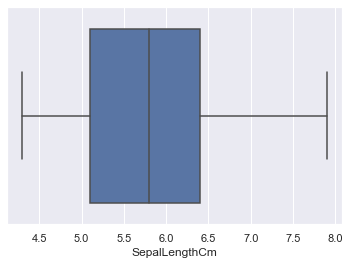

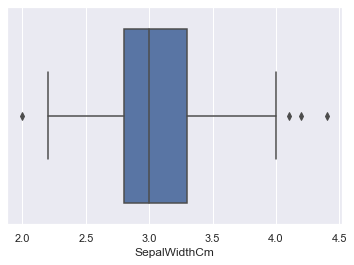

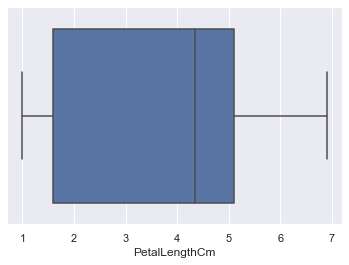

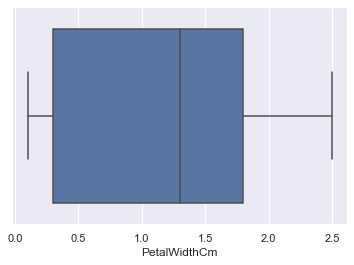

In [63]:
def drawBoxPlot(col):
    sns.boxplot(x =df[col])
    plt.show()

numerical_columns =  list(df.select_dtypes(exclude=['object','int64']))
for col in numerical_columns:
    drawBoxPlot(col)

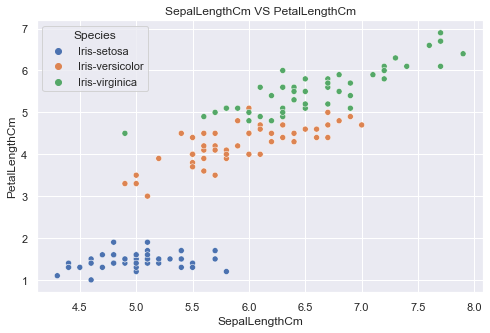

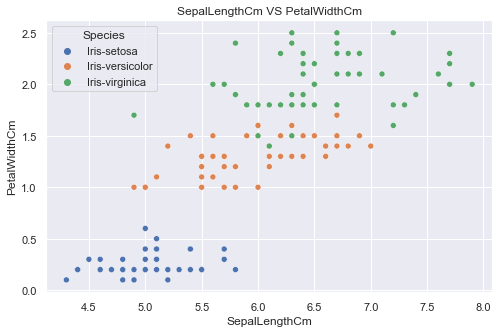

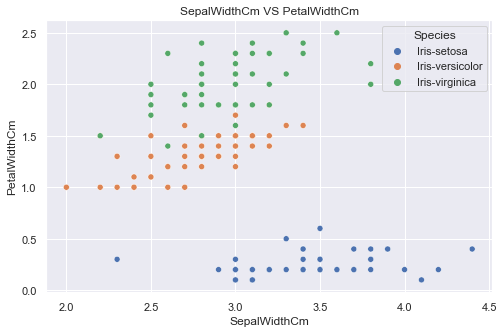

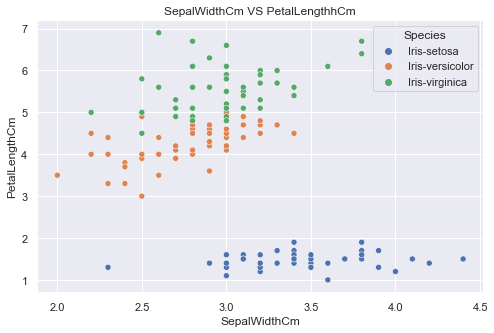

In [72]:
# Plot scatter plot for columns

plt.figure(figsize=(8,5))
plt.title('SepalLengthCm VS PetalLengthCm')
sns.scatterplot(data=df,x='SepalLengthCm',y='PetalLengthCm',hue='Species')
plt.show()

plt.figure(figsize=(8,5))
plt.title('SepalLengthCm VS PetalWidthCm')
sns.scatterplot(data=df,x='SepalLengthCm',y='PetalWidthCm',hue='Species')
plt.show()

plt.figure(figsize=(8,5))
plt.title('SepalWidthCm VS PetalWidthCm')
sns.scatterplot(data=df,x='SepalWidthCm',y='PetalWidthCm',hue='Species')
plt.show()

plt.figure(figsize=(8,5))
plt.title('SepalWidthCm VS PetalLengthhCm')
sns.scatterplot(data=df,x='SepalWidthCm',y='PetalLengthCm',hue='Species')
plt.show()

<AxesSubplot: xlabel='Species', ylabel='count'>

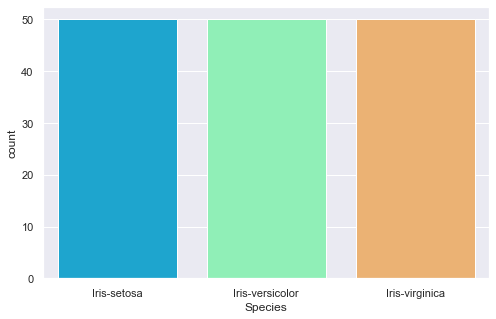

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(data=df,x='Species',palette='rainbow')

In [84]:
df.groupby('Species')['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'].mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


<AxesSubplot: >

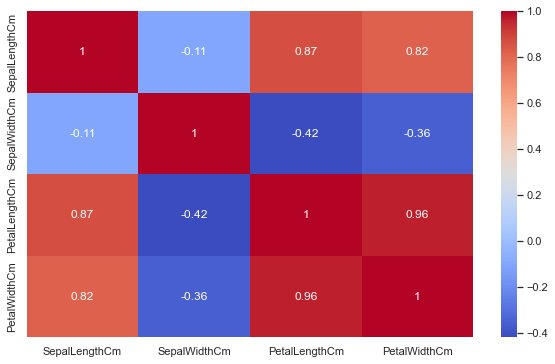

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('Id',axis=1).corr(),annot=True,cmap='coolwarm')

### Build & Evaluate The Model

In [98]:
df.drop('Id',axis=1,inplace=True)

In [99]:
X = df.drop('Species',axis=1)
y = df['Species']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [112]:
dt_model = DecisionTreeClassifier()

In [113]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [114]:
prediction_dt = dt_model.predict(X_test)

In [117]:
print(classification_report(y_test, prediction_dt))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.95      0.95      0.95        22
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [118]:
print(confusion_matrix(y_test, prediction_dt))

[[15  0  0]
 [ 0 21  1]
 [ 0  1 12]]


## BY Mohamed Batran

# 